In [ ]:
from google.colab import drive
drive.mount('gdrive')
%cd /content/gdrive/'My Drive'/Dataset/Assignment3

Mounted at gdrive
/content/gdrive/My Drive/Dataset/Assignment3


In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import seaborn as sn
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
test = sio.loadmat('dataset_a.mat')
test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'labels', 'samples'])

In [ ]:
print(type(test))
for i in test:
  print(i)
header = test['__header__']
data = test['samples']
labels = test['labels']
print(header)
print(data.ndim)
print(data.shape)
print(labels.ndim)
print(labels.shape)
# for i in var2:
#   print(i)

<class 'dict'>
__header__
__version__
__globals__
labels
samples
b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Oct 29 10:22:22 2020'
2
(10000, 2)
2
(1, 10000)


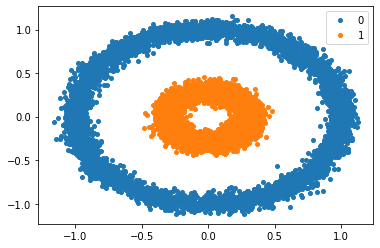

In [ ]:
#to plot
xaxis = []
yaxis = []
for x in data:
  xaxis.append(x[0])
  yaxis.append(x[1])

df = pd.DataFrame(dict(x=xaxis, y=yaxis, label=labels[0]))
groups = df.groupby('label')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()
plt.show()

##2b

In [ ]:
print(df)

             x         y  label
0    -0.809349 -0.496950      0
1     1.004988  0.065532      0
2    -0.620364  0.762912      0
3     0.008246  0.291905      1
4     0.299287  0.023049      1
...        ...       ...    ...
9995  0.606766  0.813390      0
9996  0.194848 -0.297414      1
9997 -0.277052  0.090723      1
9998 -0.415081  0.863024      0
9999  0.802294  0.484135      0

[10000 rows x 3 columns]


In [ ]:
def traintestsplit(df):
  shuffle = np.random.permutation(len(df))
  test_size = int(len(df) * 0.2)
  test_aux = shuffle[:test_size]
  train_aux = shuffle[test_size:]
  TRAIN_DF =df.iloc[train_aux]
  TEST_DF = df.iloc[test_aux]
#   print(len(TRAIN_DF))
#   print(len(TEST_DF))
  return TRAIN_DF, TEST_DF

In [ ]:
def split(train, test):
    features = ['x', 'y']
    xtrain = train[features]
    xtest = test[features]
    ytrain = train.label
    ytest = test.label
    return xtrain, ytrain, xtest, ytest

In [ ]:
train, test = traintestsplit(df) 
xtrain, ytrain, xtest, ytest = split(train, test)
# print(xtrain)
# print(ytrain)
# print(xtest)
# print(ytest)

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(xtrain, ytrain)
clf.score(xtest, ytest)

0.6625

In [ ]:
#predict function
def linearPredict(clf, xtest):
  size = len(xtest)
  w = clf.coef_
  y_pred = np.array([]) 
  for i in range(size):
    y = np.sign(np.dot(w, xtest[i] )+ clf.intercept_)
    y_pred = np.append(y_pred, y)
  return y_pred

In [ ]:
# def predict(self,features):
#   # sign( x.w+b )
#   classification = np.sign(np.dot(np.array(features),self.w)+self.b)

#   return classification

In [ ]:
# def predict(self,features):
#         #sign(x.w+b)
#         classification = np.sign(np.dot(np.array(features),self.w)+self.b)
#         if classification!=0 and self.visualization:
#             self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
#         return (classification,np.dot(np.array(features),self.w)+self.b)

In [ ]:
def predict(clf, X_test):
  size = X_test.shape[0]
  w = clf.coef_
  y_pred = np.array([]) 
  for i in range(size):
    y = np.sign(np.dot(w, X_test[i] )+ clf.intercept_)
    y_pred = np.append(y_pred, y)
  return y_pred


In [ ]:
y1 = clf.predict(xtest)
print(accuracy_score(ytest, y1)*100)

66.25


## Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['rbf']} 
param_grid = {'C': [0.1, 1, 10, 100, 1000]}   
  
grid = GridSearchCV(svm.LinearSVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(xtrain, ytrain) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.448, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.457, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.429, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.460, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.501, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.448, total=   0.0s
[CV] C=1 .............................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=10, score=0.448, total=   0.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.457, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.429, total=   0.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.460, total=   0.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.501, total=   0.2s
[CV] C=100 ...........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=100, score=0.477, total=   0.3s
[CV] C=100 ...........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=100, score=0.396, total=   0.3s
[CV] C=100 ...........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=100, score=0.522, total=   0.3s
[CV] C=100 ...........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=100, score=0.312, total=   0.4s
[CV] C=100 ...........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=100, score=0.499, total=   0.3s
[CV] C=1000 ..........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................. C=1000, score=0.608, total=   0.3s
[CV] C=1000 ..........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................. C=1000, score=0.498, total=   0.3s
[CV] C=1000 ..........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................. C=1000, score=0.558, total=   0.3s
[CV] C=1000 ..........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................. C=1000, score=0.457, total=   0.3s
[CV] C=1000 ..........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.4s finished


[CV] .............................. C=1000, score=0.499, total=   0.3s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000}
LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [ ]:
grid_predictions = grid.predict(xtest) 
from sklearn.metrics import classification_report, confusion_matrix
# print classification report 
print(classification_report(ytest, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.23      0.38       986
           1       0.57      1.00      0.73      1014

    accuracy                           0.62      2000
   macro avg       0.79      0.62      0.55      2000
weighted avg       0.78      0.62      0.56      2000



### For Optimal C = '1'

In [ ]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(xtrain, ytrain)
y1 = clf.predict(xtest)
print(accuracy_score(ytest, y1)*100)

66.25


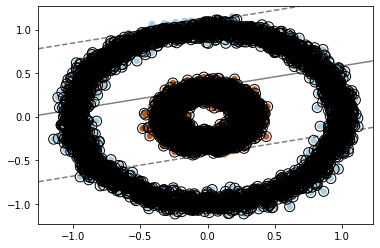

In [ ]:
xt = xtrain.to_numpy()
yt = ytrain.to_numpy()
plt.scatter(xt[:, 0], xt[:, 1], c=ytrain, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(xtrain, ytrain)
y1 = clf.predict(xtest)
print(accuracy_score(ytest, y1)*100)

65.95


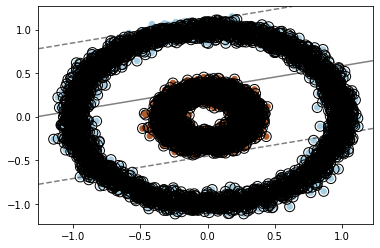

In [ ]:
xt = xtrain.to_numpy()
yt = ytrain.to_numpy()
plt.scatter(xt[:, 0], xt[:, 1], c=ytrain, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
clf = svm.SVC(kernel='linear', C=10)
clf.fit(xtrain, ytrain)
y1 = clf.predict(xtest)
print(accuracy_score(ytest, y1)*100)

66.25


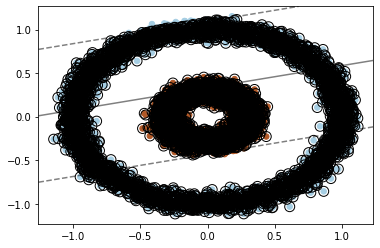

In [ ]:
xt = xtrain.to_numpy()
yt = ytrain.to_numpy()
plt.scatter(xt[:, 0], xt[:, 1], c=ytrain, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()